<h1 align="center">Data Visualization with Python</h1>

## Instructors
- Scott Bailey 
- Vincent Tompkins

## Learning objectives
By the end of our workshop today, we hope you'll be able to load in data and visualize it in different ways depending on your specific needs and the nature of the data. We will work with a couple of customized datasets from the [Stanford Open Policing Project](https://openpolicing.stanford.edu/).

## Topics
- Visualization
- Univariate plotting
 - Bar charts
 - Histograms
 - Line charts
 - Time series
 - Box plots
 - Area charts
- Bivariate plotting
 - Scatter plots
 - Stacked plots
 - Box plots (again)
- Styling
- Seaborn
 - Faceting
 
##  Setup

Clicking the "Open in Colab" button you can see after opening the Github link above will create a new temporary copy of the notebook in the Google Colaboratory environment. If you then click the "Copy to Drive" button that appears in the menu bar, the notebook will then be attached to your own user account, so you can edit it in any way you like -- you can even take notes directly in the notebook.

## Jupyter Notebooks and Google Colaboratory

Jupyter notebooks are a way to write and run Python code in an interactive way. They're quickly becoming a standard way of putting together data, code, and written explanations or visualizations into a single document and sharing that. There are a lot of ways that you can run Jupyter notebooks, including just locally on your computer, but we've decided to use Google's Colaboratory notebook platform for this workshop.  Colaboratory is “a Google research project created to help disseminate machine learning education and research.”  If you would like to know more about Colaboratory in general, you can visit the [Welcome Notebook](https://colab.research.google.com/notebooks/welcome.ipynb).

Using the Google Colaboratory platform allows us to focus on learning and writing Python in the workshop rather than on setting up Python, which can sometimes take a bit of extra work depending on platforms, operating systems, and other installed applications. If you'd like to install a Python distribution locally, though, we're happy to help. Feel free to drop by our walk-in consulting or schedule an appointment with us.

https://go.ncsu.edu/dvs-request

## Environment
For those using Anaconda or their own local installation of Jupyter Notebooks, in this workshop we'll need an environment with the following packages:
- `pandas`
- `matplotlib`
- `seaborn`, available in the `conda-forge` channel


## Datasets and Pandas

From Jake Vanderplas' book [**Python Data Science Handbook**](http://shop.oreilly.com/product/0636920034919.do) (from which some code excerpts are used in this workshop):

> Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a `DataFrame`. `DataFrame`s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

In [1]:
import pandas as pd

# Set some options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

We will be using a couple of datasets from the Stanford Open Policing project.

In [4]:
# Data source: https://openpolicing.stanford.edu/data/
raleigh_stops_url = "https://stacks.stanford.edu/file/druid:kx738rc7407/kx738rc7407_nc_raleigh_2019_12_17.csv.zip"

In [3]:
pd.read_csv(raleigh_stops_url)

,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,...,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,raw_Ethnicity,raw_Race,raw_action_description
0,1424588,2002-01-01,01:07:00,"RA, Wake County",Wake County,24,black,female,93e6ddfbcf,Raleigh Police Department,...,False,False,False,NaN,NaN,NaN,Stop Light/Sign Violation,N,B,Citation Issued
1,1424589,2002-01-01,01:19:18,"RA, Wake County",Wake County,64,white,male,c306a43c0b,Raleigh Police Department,...,False,False,False,NaN,NaN,NaN,Other Motor Vehicle Violation,N,W,Verbal Warning
2,1424590,2002-01-01,01:46:49,"RA, Wake County",Wake County,25,white,male,6673e6ef48,Raleigh Police Department,...,False,False,False,NaN,NaN,NaN,Other Motor Vehicle Violation,N,W,Citation Issued
3,1424591,2002-01-01,02:30:00,"RA, Wake County",Wake County,51,black,male,f33c2e2cc6,Raleigh Police Department,...,False,False,False,NaN,NaN,NaN,Driving While Impaired,N,B,No Action Taken
4,1424592,2002-01-01,07:23:00,"RA, Wake County",Wake County,36,white,male,ac1d3732e8,Raleigh Police Department,...,False,False,False,NaN,NaN,NaN,Speed Limit Violation,N,W,Citation Issued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856395,20275086,2015-12-17,19:04:00,"RALEIGH, Wake County",Wake County,19,black,male,592762b966,Raleigh Police Department,...,True,True,True,probable cause,NaN,Observation of Suspected Contraband,Safe Movement Violation,N,B,Citation Issued
856396,20275087,2015-12-17,14:40:00,"RALEIGH, Wake County",Wake County,25,black,male,66fcf047b2,Raleigh Police Department,...,True,True,True,consent,NaN,Other Official Information,Other Motor Vehicle Violation,N,B,On-View Arrest
856397,20275088,2015-12-20,22:43:00,"RALEIGH, Wake County",Wake County,25,white,female,5ae57e8e2b,Raleigh Police Department,...,True,True,True,other,NaN,Other Official Information,Driving While Impaired,N,W,On-View Arrest
856398,20275089,2015-12-20,21:28:00,"RALEIGH, Wake County",Wake County,27,black,male,5deb7e5436,Raleigh Police Department,...,True,True,True,probable cause,NaN,Observation of Suspected Contraband,Vehicle Equipment Violation,N,B,Citation Issued


Pandas has a very decent [documentation](http://pandas.pydata.org/pandas-docs/stable/), and using Jupyter, any method help can be shown by appending the a `?` to the end and running the cell.

One of the nice things about Pandas is that is able to load in data from the Internet without blinking an eye. The first dataset, which we will store in the `DataFrame` `stops`, contains one entry for each traffic stop in Mississippi between 2013 and 2016. Let's take a look at it.

In [5]:
stops = pd.read_csv(
    raleigh_stops_url,
    index_col='raw_row_number',
    parse_dates=['date'])
stops

,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,...,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,raw_Ethnicity,raw_Race,raw_action_description
raw_row_number,,,,,,,,,,,,,,,,,,,,,
1424588,2002-01-01,01:07:00,"RA, Wake County",Wake County,24,black,female,93e6ddfbcf,Raleigh Police Department,vehicular,...,False,False,False,NaN,NaN,NaN,Stop Light/Sign Violation,N,B,Citation Issued
1424589,2002-01-01,01:19:18,"RA, Wake County",Wake County,64,white,male,c306a43c0b,Raleigh Police Department,vehicular,...,False,False,False,NaN,NaN,NaN,Other Motor Vehicle Violation,N,W,Verbal Warning
1424590,2002-01-01,01:46:49,"RA, Wake County",Wake County,25,white,male,6673e6ef48,Raleigh Police Department,vehicular,...,False,False,False,NaN,NaN,NaN,Other Motor Vehicle Violation,N,W,Citation Issued
1424591,2002-01-01,02:30:00,"RA, Wake County",Wake County,51,black,male,f33c2e2cc6,Raleigh Police Department,vehicular,...,False,False,False,NaN,NaN,NaN,Driving While Impaired,N,B,No Action Taken
1424592,2002-01-01,07:23:00,"RA, Wake County",Wake County,36,white,male,ac1d3732e8,Raleigh Police Department,vehicular,...,False,False,False,NaN,NaN,NaN,Speed Limit Violation,N,W,Citation Issued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20275086,2015-12-17,19:04:00,"RALEIGH, Wake County",Wake County,19,black,male,592762b966,Raleigh Police Department,vehicular,...,True,True,True,probable cause,NaN,Observation of Suspected Contraband,Safe Movement Violation,N,B,Citation Issued
20275087,2015-12-17,14:40:00,"RALEIGH, Wake County",Wake County,25,black,male,66fcf047b2,Raleigh Police Department,vehicular,...,True,True,True,consent,NaN,Other Official Information,Other Motor Vehicle Violation,N,B,On-View Arrest
20275088,2015-12-20,22:43:00,"RALEIGH, Wake County",Wake County,25,white,female,5ae57e8e2b,Raleigh Police Department,vehicular,...,True,True,True,other,NaN,Other Official Information,Driving While Impaired,N,W,On-View Arrest


Let's take a minute to explore the data a bit to see what we might want to visualize.

In [10]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856400 entries, 1424588 to 20275090
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    856400 non-null  datetime64[ns]
 1   time                    855681 non-null  object        
 2   location                856400 non-null  object        
 3   county_name             856400 non-null  object        
 4   subject_age             856400 non-null  int64         
 5   subject_race            856400 non-null  object        
 6   subject_sex             856400 non-null  object        
 7   officer_id_hash         856400 non-null  object        
 8   department_name         856400 non-null  object        
 9   type                    856400 non-null  object        
 10  arrest_made             856400 non-null  bool          
 11  citation_issued         856400 non-null  bool          
 12  warning_issued        

In [21]:
stops["type"]

raw_row_number
1424588     vehicular
1424589     vehicular
1424590     vehicular
1424591     vehicular
1424592     vehicular
              ...    
20275086    vehicular
20275087    vehicular
20275088    vehicular
20275089    vehicular
20275090    vehicular
Name: type, Length: 856400, dtype: object

In [14]:
stops["subject_race"].describe()

count     856400
unique         6
top        black
freq      383628
Name: subject_race, dtype: object

In [15]:
stops["subject_age"].describe()

count    856400.000000
mean         33.692688
std          12.093385
min          10.000000
25%          24.000000
50%          31.000000
75%          41.000000
max         110.000000
Name: subject_age, dtype: float64

In [16]:
stops["search_person"].describe()

count     856400
unique         2
top        False
freq      824939
Name: search_person, dtype: object

In [17]:
stops["search_person"].value_counts()

False    824939
True      31461
Name: search_person, dtype: int64

In [18]:
stops["raw_action_description"]

raw_row_number
1424588     Citation Issued
1424589      Verbal Warning
1424590     Citation Issued
1424591     No Action Taken
1424592     Citation Issued
                 ...       
20275086    Citation Issued
20275087     On-View Arrest
20275088     On-View Arrest
20275089    Citation Issued
20275090    Citation Issued
Name: raw_action_description, Length: 856400, dtype: object

We will also be using the same dataset, but aggregated by county and enriched with some other county information. This dataset, which we will store in `stops_county`, contains two variables which represent for each county, and for both white and black, the ratio of drivers stopped out of the total population over 18: `pct_black_stopped` and `pct_white_stopped`.

## Visualization

Visualization in Python is a bit... convoluted. And it changes almost every day. 

<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png" width=960>
<div align="right">Adapted by [Nicolas P. Rougier](https://github.com/rougier/python-visualization-landscape) from a [Jake VanderPlass' presentation](https://twitter.com/jakevdp/status/852308415372115968)</div>

The library matplotlib is one of the oldest and most pervasive options for plotting in Python, and set the foundation for many other libraries. Pandas also provides some useful shortcuts on top of matplotlib. These utilities are available in all `Series` and `DataFrame` objects just by calling `plot()`. But first we need to tell Jupyter that we are going to plot some charts using the plotting library matplotlib, so it knows how to render them.

In [6]:
%%capture
# enables inline plotting in Jupyter using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
plt.rcParams["figure.figsize"] = (10, 6)  # default figure size in inches

<img src="https://matplotlib.org/_images/anatomy.png" width=600>
<div align="right">From the [matplotlib documentation](https://matplotlib.org/examples/showcase/anatomy.html)</div>

Unlike libraries like plotnine, ggpy, or R's ggplot, matplotlib doesn't follow the [Leland Wilkinson’s The Grammar of Graphics](https://stanford.idm.oclc.org/login?url=http://www.myilibrary.com?id=46066). Instead, it relies on the Object-Oriented-Programming model of Python and all aspects of a plot are represented by objects, methods, properties, and arguments. 

## Univariate plotting

<table>
<tbody><tr>
<td><img src="https://camo.githubusercontent.com/fd040001f0007b89887ba2b2565698dfd790b85c/68747470733a2f2f692e696d6775722e636f6d2f736b615a5068622e706e67" width="350px" data-canonical-src="https://i.imgur.com/skaZPhb.png"></td>
<td><img src="https://camo.githubusercontent.com/98528c164a36365fa89ef9eb89d8664919e6a8ed/68747470733a2f2f692e696d6775722e636f6d2f67614e747459642e706e67" width="350px" data-canonical-src="https://i.imgur.com/gaNttYd.png"></td>
<td><img src="https://camo.githubusercontent.com/ad41d9f3a80ae03f9f79ea700b3e01a5155742da/68747470733a2f2f692e696d6775722e636f6d2f70616d70696f682e706e67" data-canonical-src="https://i.imgur.com/pampioh.png"></td>
<td><img src="https://camo.githubusercontent.com/f38749834bc72f3526a737244af468b99c91666f/68747470733a2f2f692e696d6775722e636f6d2f4f536275737a642e706e67" data-canonical-src="https://i.imgur.com/OSbuszd.png"></td>
</tr>
<tr>
<td>Bar Chat</td>
<td>Line Chart</td>
<td>Area Chart</td>
<td>Histogram</td>
</tr>
<tr>
<td>`df.plot.bar()`</td>
<td>`df.plot.line()`</td>
<td>`df.plot.area()`</td>
<td>`df.plot.hist()`</td>
</tr>
<tr>
<td>Good for nominal and small ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
<td>Good for ordinal categorical and interval data.</td>
<td>Good for interval data.</td>
</tr>
</tbody></table>
<div align="right">From Kaggle <a href="https://www.kaggle.com/learn/data-visualisation">Data Visualization</a> circa 2017</div>

The simplest type of visualization is single-variable or "univariate" visualizations. This includes basic tools like bar plots and line charts.

### Bar and line plots

Bar charts are arguably the simplest data visualization. They map categories to numbers. In our case, we could want to map the types of traffic violation (category) to the number of violations by type (number). We'll use the `stops` `DataFrame` now.

In [8]:
stops['reason_for_stop'].value_counts()

Speed Limit Violation            260832
Vehicle Regulatory Violation     255953
Vehicle Equipment Violation       89145
Other Motor Vehicle Violation     73671
Stop Light/Sign Violation         54976
Safe Movement Violation           49838
Investigation                     32550
Seat Belt Violation               26948
Driving While Impaired            12270
Checkpoint                          217
Name: reason_for_stop, dtype: int64

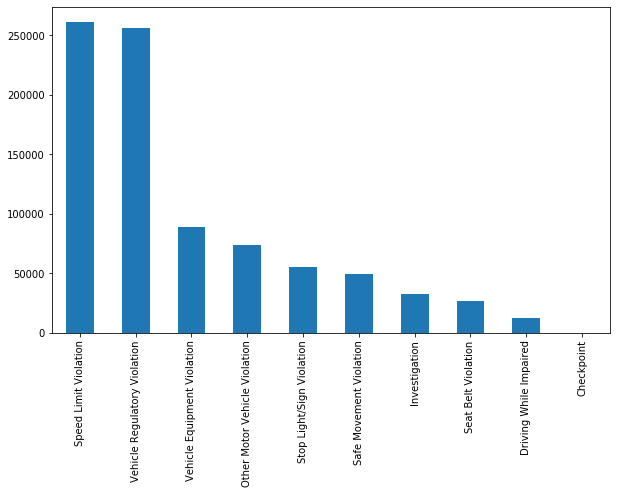

In [9]:
stops['reason_for_stop'].value_counts().plot.bar()

We could also using the `rot` parameter to rotate the labels in our X axe.

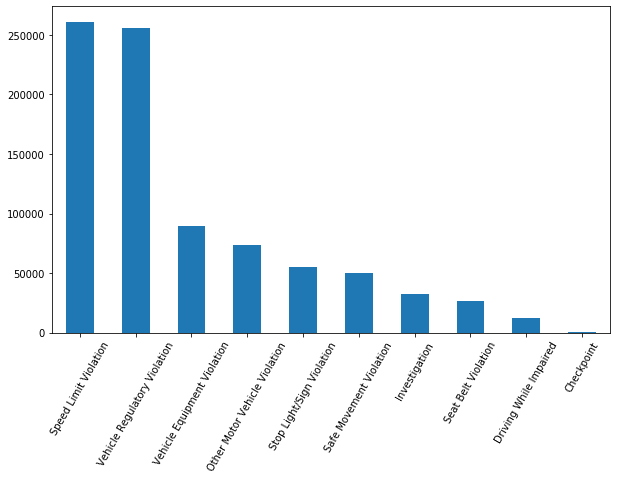

In [28]:
stops['reason_for_stop'].value_counts().plot.bar(rot=60)

Bar charts are very flexible: The height can represent anything, as long as it is a number. And each bar can represent anything, as long as it is a category.

In this case the categories are **nominal** categories: "pure" categories that don't make a lot of sense to order. Nominal categorical variables include things like countries, ZIP codes, types of cheese, and lunar landers. The other kind are **ordinal** categories: things that do make sense to compare, like earthquake magnitudes, housing complexes with certain numbers of apartments, and the sizes of bags of chips at your local deli.

### Styling your plot

Let's create another bar chart, and start changing the styling a bit. We'll start with the driver's race. 

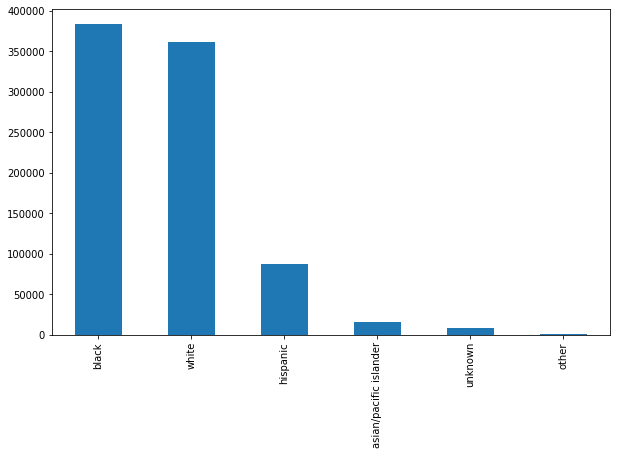

In [31]:
stops["subject_race"].value_counts().plot.bar()

We can easily change the color of the bars.

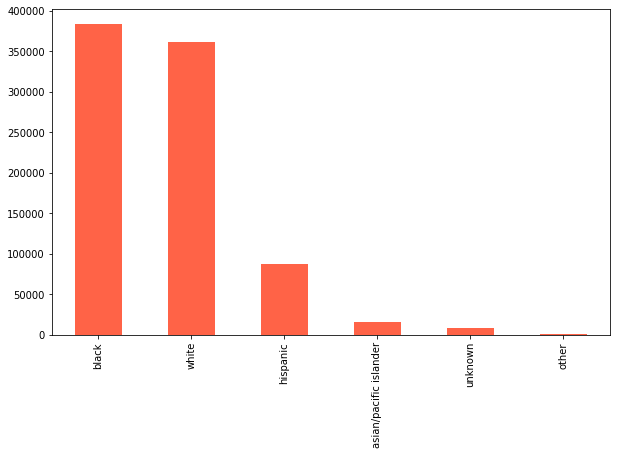

In [34]:
stops["subject_race"].value_counts().plot.bar(color='tomato')

And even the opacity by using `alpha`.

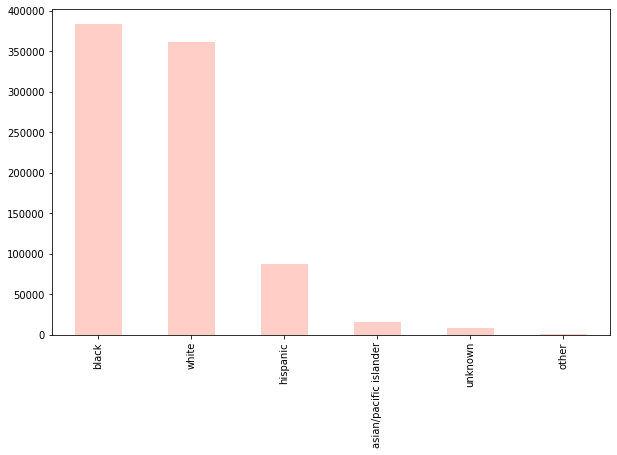

In [35]:
stops["subject_race"].value_counts().plot.bar(alpha=0.3, color='tomato')

Having vertical labels isn't super readable, and rotating the labels will only help so much. Let's use a horizontal bar chart instead, `barh()`, and also pass in `figsize`.

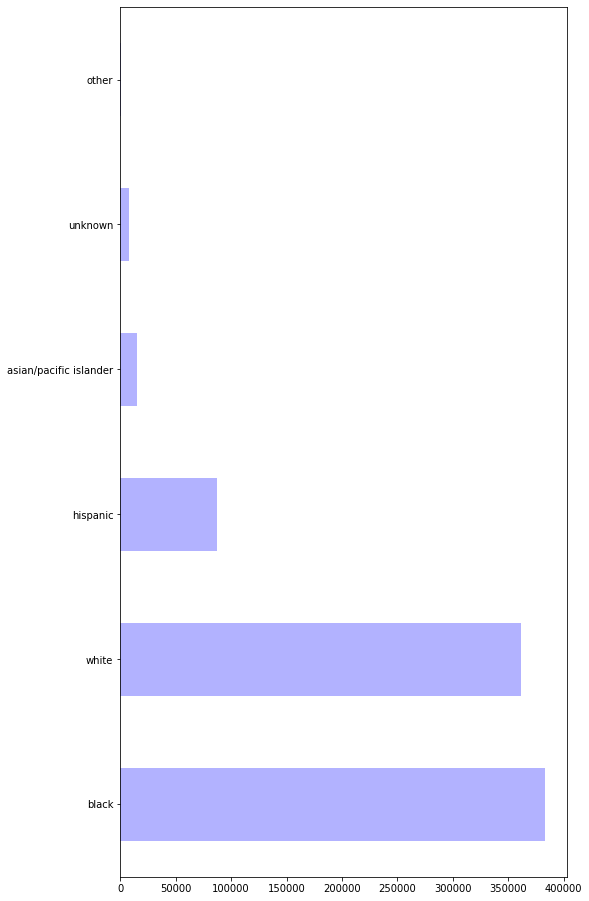

In [36]:
stops["subject_race"].value_counts().plot.barh(alpha=0.3, color='blue', figsize=(8, 16))

Race isn't an ordered category, but let's sort alphabetically just to see how we would. At the same time, we'll switch our syntax a bit so you can see how you can call `.plot` on a DataFrame and specify which columns should be on the x and y axes.

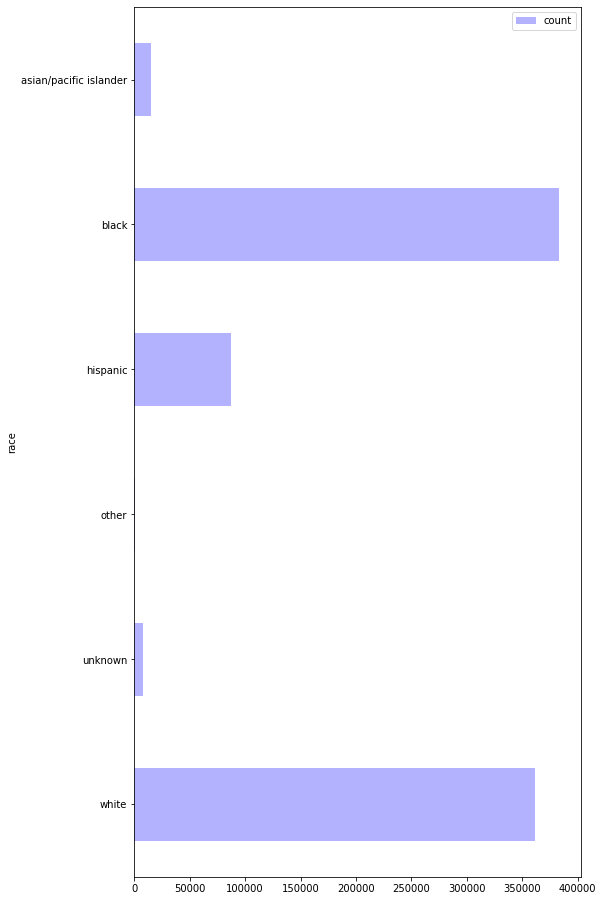

In [60]:
# We'll store our value counts in a DataFrame, but we have to reset the index and change some column names
# so they make more sense. 
race_count = stops["subject_race"].value_counts().reset_index()
race_count.rename(columns={"index": "race", "subject_race": "count"}, inplace=True)

(race_count
     .sort_values(["race"], ascending=False)
     .plot.barh(x="race", y="count", alpha=0.3, color='blue', figsize=(8, 16)))

Each time you call `plot()` an `Axes` object is returned, and Jupyter knows how to paint those. `Axes` objects are objects of the underlying `matplotlib` library for plotting in Python, and as such, lots of different options can be given to customize the aspect.

For example, we could set axes labels or a title. Let's also get rid of the legend.

Text(0.5, 1.0, 'Race in Raleigh Traffic Stops')

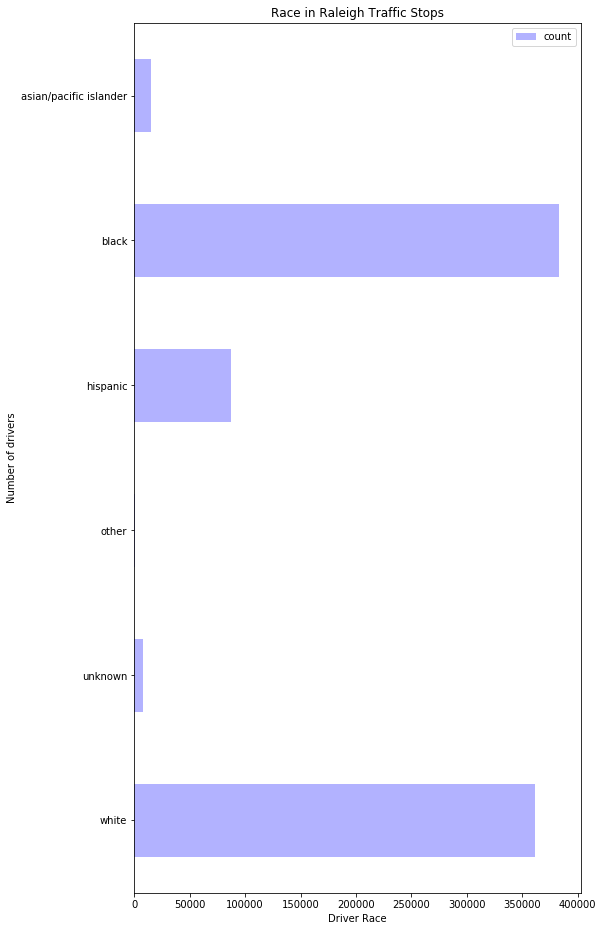

In [64]:
ax = (race_count
     .sort_values(["race"], ascending=False)
     .plot.barh(x="race", y="count", alpha=0.3, color='blue', figsize=(8, 16)))
ax.set_xlabel("Driver Race")
ax.set_ylabel("Number of drivers")
ax.set_title("Race in Raleigh Traffic Stops")

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Using `stops`, plot the total number of each type of vilolation in a horizontal bar chart. Adjust the labels to describe your plot accurately.
</p>
</div>

Text(0.5, 1.0, 'Raleigh Traffic Violation Types')

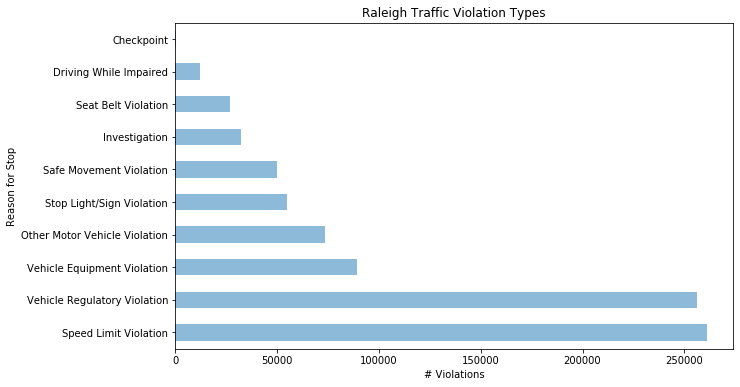

In [65]:
ax = stops['reason_for_stop'].value_counts().plot.barh(alpha=0.5)
ax.set_xlabel("# Violations")
ax.set_ylabel("Reason for Stop")
ax.set_title("Raleigh Traffic Violation Types")

### Histograms

A histogram looks, trivially, like a bar plot. And it basically is. In fact, a histogram is special kind of bar plot that splits your data into even intervals and displays how many entries are in each interval with bars. The only analytical difference is that instead of each bar representing a single value, it represents a range of values; this is call the bin.

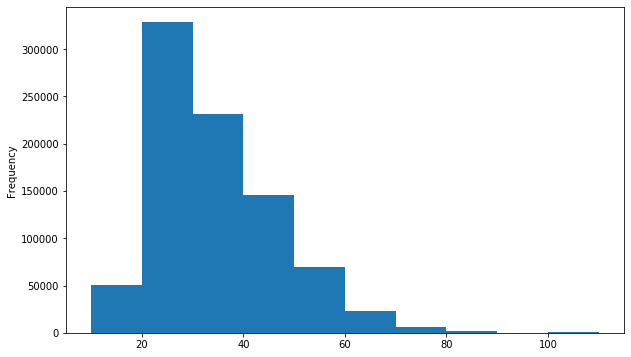

In [67]:
stops['subject_age'].plot.hist()

The number of bins can also be setup beforehand.

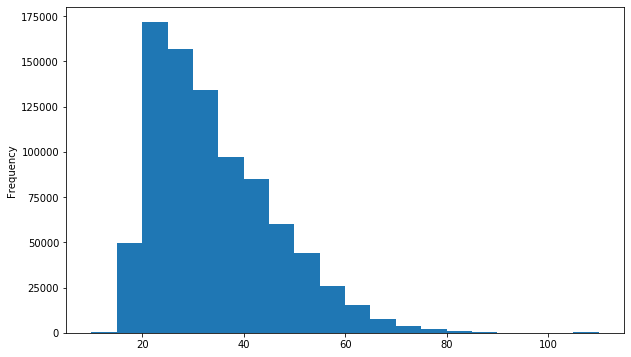

In [69]:
stops['subject_age'].plot.hist(bins=20)

### Boxplots

Another way to visualize univariate distributions is the boxplot, which displays a lot of statistical useful information about it.

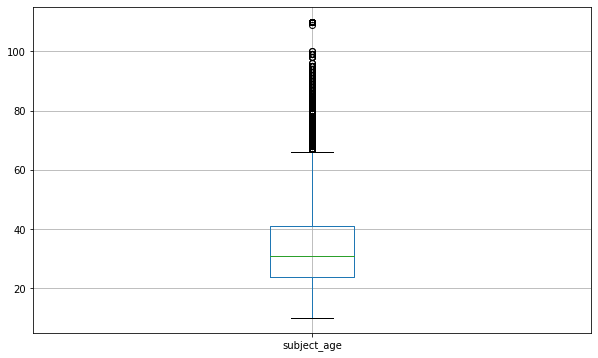

In [71]:
stops.boxplot('subject_age')

Boxplots can be very powerful when comparing data.

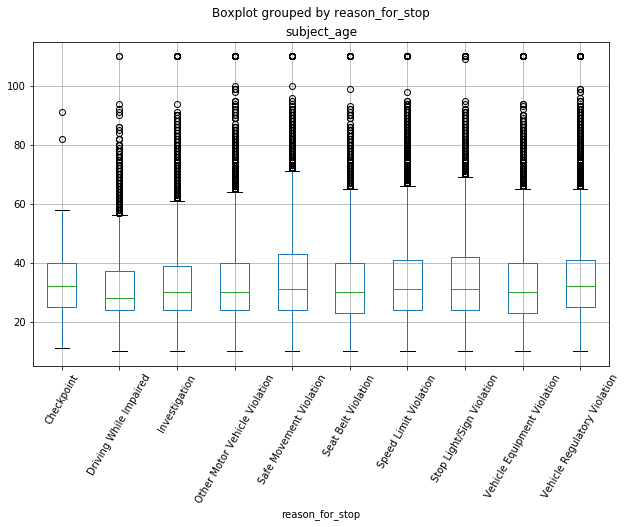

In [76]:
stops.boxplot('subject_age', by='reason_for_stop', rot=60)

### Line charts

A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mush them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!

Let's try using a line chart when we previously used a bar chart.

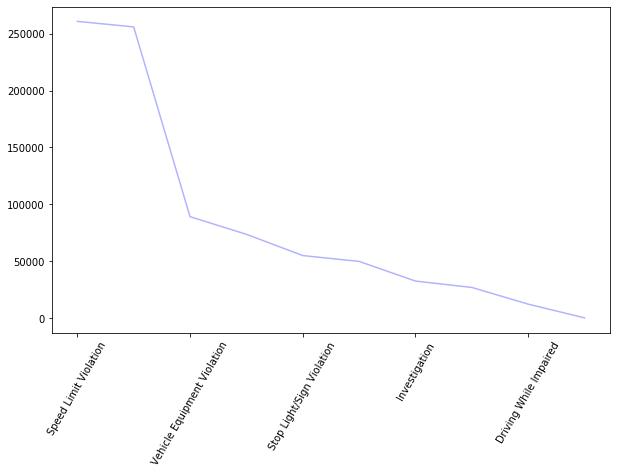

In [78]:
(stops["reason_for_stop"].value_counts()
     .plot.line(alpha=0.3, color='blue', legend=False, rot=60))

Line charts also make it harder to distinguish between individual values. In general, if your data can fit into a bar chart, just use a bar chart.

### Time series

There is, however, a type of data at which line charts excel: time series.

To demonstrate time series data we will count the number of violations for each day of the month.

In [100]:
# Create a new columns for month, day, year
stops["month"] = stops["date"].dt.month
stops["day"] = stops["date"].dt.day
stops["year"] = stops["date"].dt.year
stops

,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,...,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,raw_Ethnicity,raw_Race,raw_action_description,day,month,year
raw_row_number,,,,,,,,,,,,,,,,,,,,,
1424588,2002-01-01,01:07:00,"RA, Wake County",Wake County,24,black,female,93e6ddfbcf,Raleigh Police Department,vehicular,...,NaN,NaN,NaN,Stop Light/Sign Violation,N,B,Citation Issued,1,1,2002
1424589,2002-01-01,01:19:18,"RA, Wake County",Wake County,64,white,male,c306a43c0b,Raleigh Police Department,vehicular,...,NaN,NaN,NaN,Other Motor Vehicle Violation,N,W,Verbal Warning,1,1,2002
1424590,2002-01-01,01:46:49,"RA, Wake County",Wake County,25,white,male,6673e6ef48,Raleigh Police Department,vehicular,...,NaN,NaN,NaN,Other Motor Vehicle Violation,N,W,Citation Issued,1,1,2002
1424591,2002-01-01,02:30:00,"RA, Wake County",Wake County,51,black,male,f33c2e2cc6,Raleigh Police Department,vehicular,...,NaN,NaN,NaN,Driving While Impaired,N,B,No Action Taken,1,1,2002
1424592,2002-01-01,07:23:00,"RA, Wake County",Wake County,36,white,male,ac1d3732e8,Raleigh Police Department,vehicular,...,NaN,NaN,NaN,Speed Limit Violation,N,W,Citation Issued,1,1,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20275086,2015-12-17,19:04:00,"RALEIGH, Wake County",Wake County,19,black,male,592762b966,Raleigh Police Department,vehicular,...,probable cause,NaN,Observation of Suspected Contraband,Safe Movement Violation,N,B,Citation Issued,17,12,2015
20275087,2015-12-17,14:40:00,"RALEIGH, Wake County",Wake County,25,black,male,66fcf047b2,Raleigh Police Department,vehicular,...,consent,NaN,Other Official Information,Other Motor Vehicle Violation,N,B,On-View Arrest,17,12,2015
20275088,2015-12-20,22:43:00,"RALEIGH, Wake County",Wake County,25,white,female,5ae57e8e2b,Raleigh Police Department,vehicular,...,other,NaN,Other Official Information,Driving While Impaired,N,W,On-View Arrest,20,12,2015


We'll create a subset dataframe with just the data from 2015, the most recent year in the dataset.

In [101]:
stops_2015 = stops[stops.year == 2015]

Depending on what we're trying to do, we could create a new dataframe with a groupby statement, but for now we'll just use `.value_counts`.

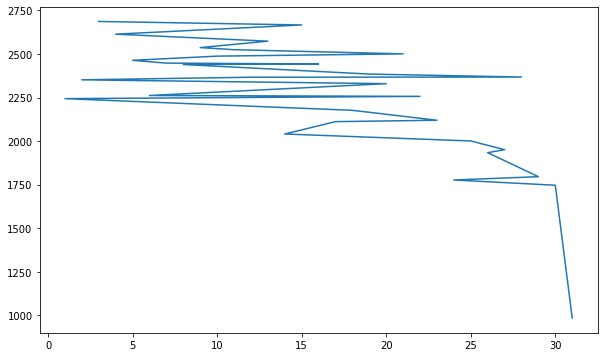

In [102]:
stops_2015["day"].value_counts().plot.line()

What do you think has happened here?

In [103]:
stops_2015["day"].value_counts().sort_index()

1     2244
2     2352
3     2687
4     2614
5     2464
      ... 
27    1951
28    2368
29    1796
30    1747
31     985
Name: day, Length: 31, dtype: int64

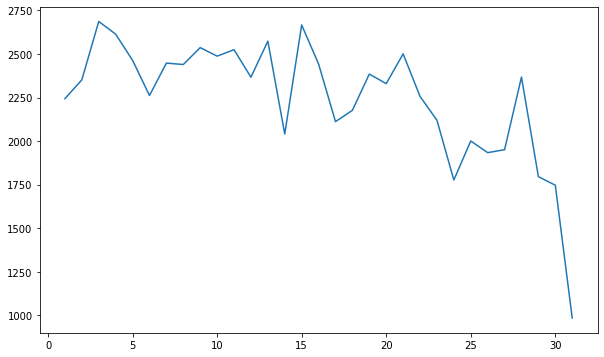

In [104]:
stops_2015["day"].value_counts().sort_index().plot.line()

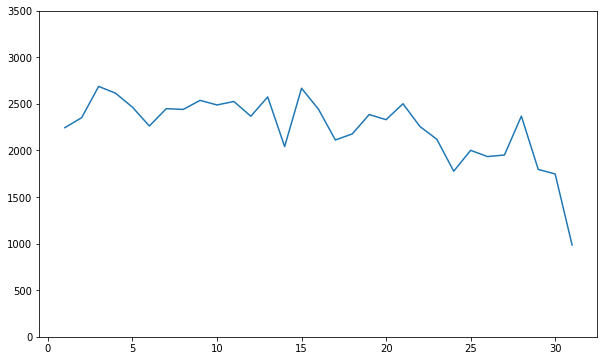

In [107]:
stops_2015["day"].value_counts().sort_index().plot.line(ylim=(0, 3500))

### Area charts

Area charts are just line charts, but with the bottom shaded in

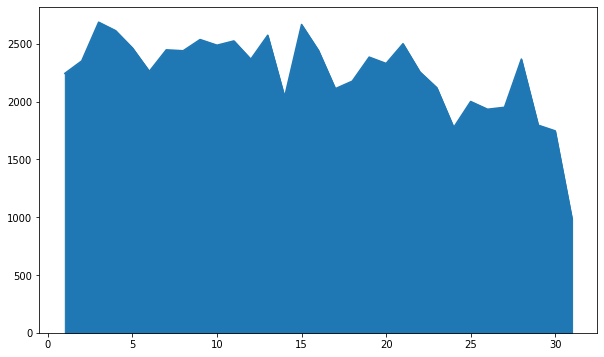

In [113]:
stops_2015["day"].value_counts().sort_index().plot.area()

When plotting only one variable, the difference between an area chart and a line chart can be mostly visual. When plotting the distribution of data, though, area charts often convey information more clearly. 

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Using `stops`, plot a histogram that shows the distribution of crime over the days of the month. Experiment with the number of bins to get close to a representation of weeks. 
</p>
</div>

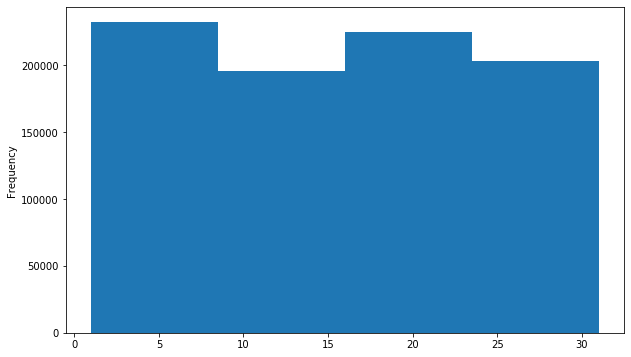

In [96]:
stops['day'].plot.hist(bins=4)

## Bivariate plotting

<table>
<tbody><tr>
<td><img src="https://i.imgur.com/bBj1G1v.png" width="350px"></td>
<td><img src="https://i.imgur.com/ChK9zR3.png" width="350px"></td>
<td><img src="https://i.imgur.com/KBloVHe.png" width="350px"></td>
<td><img src="https://i.imgur.com/C7kEWq7.png" width="350px"></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Scatter Plot</td>
<td style="font-weight:bold; font-size:16px;">Hex Plot</td>
<td style="font-weight:bold; font-size:16px;">Stacked Bar Chart</td>
<td style="font-weight:bold; font-size:16px;">Bivariate Line Chart</td>
</tr>
<tr>
<td>`df.plot.scatter()`</td>
<td>`df.plot.hex()`</td>
<td>`df.plot.bar(stacked=True)`</td>
<td>`df.plot.line()`</td>
</tr>
<tr>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for nominal and ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
</tr>
</tbody></table>
<div align="right">From Kaggle <a href="https://www.kaggle.com/learn/data-visualisation">Data Visualization</a> circa 2017</div>

In order to understand how variables interact with one another, we might use plots that enable these possibilities. Bivariate plotting can also be easily extended to more than 2 variables (in some cases).

### Scatter plots

A scatter plot is the simplest bivariate plot: it maps each variable of interest to a point in two-dimensional space. To draw a scatter plot you need to call `scatter()` on a `DataFrame`'s `plot` attribute, and then pass in the variables names representing the axes, `x` and `y`, in the `DataFrame` columns.

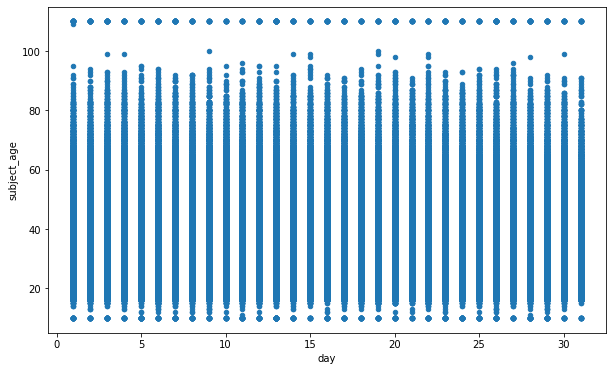

In [99]:
stops.plot.scatter(x='day', y='subject_age')

We used our two numerical variables here, but a scatter plot really isn't that useful for displaying this information. Maybe it's time to switch datasets to one that covers all of NC. 

Here's a dataset I created from the NC State Patrol data from the Stanford Open Policing Project. It only contains data from 2010 on, aggregates on the county, and focuses on what percent of the total traffic arrests for each county came from each identified racial group. 

In [125]:
# Switch to the url in the Github repo
arrests = pd.read_csv("nc_traffic_arrests_race_since_2010.csv")
arrests = arrests[arrests.county_name.notna()]
arrests.head()

,county_name,county_stops_total,count_arrests_total,asian/pacific islander,black,hispanic,other,unknown,white
0,Alamance County,189030,5785,0.003284,0.390838,0.183924,0.002593,0.003284,0.416076
1,Alexander County,90665,841,0.008323,0.124851,0.079667,0.000000,0.003567,0.783591
2,Alleghany County,61714,45,0.000000,0.022222,0.044444,0.000000,0.000000,0.933333
3,Anson County,66233,701,0.004280,0.356633,0.098431,0.002853,0.008559,0.529244
4,Ashe County,5206,52,0.000000,0.019231,0.153846,0.000000,0.000000,0.826923


Now that we have a lot more numerical values, let's try a couple of different scatterplots.

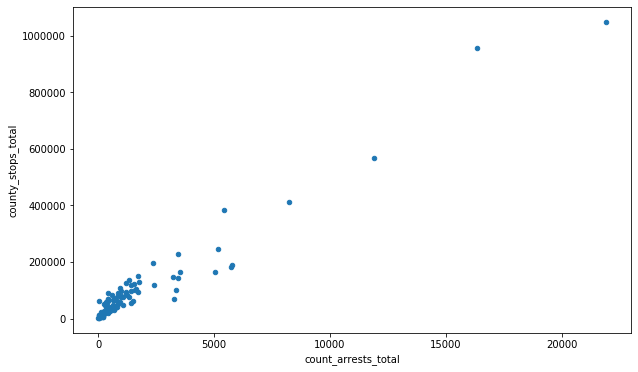

In [126]:
arrests.plot.scatter(x="count_arrests_total", y="county_stops_total")

In [127]:
arrests.sort_values("count_arrests_total", ascending=False)

,county_name,county_stops_total,count_arrests_total,asian/pacific islander,black,hispanic,other,unknown,white
59,Mecklenburg County,1050313,21887,0.012839,0.555901,0.121716,0.001005,0.006305,0.302234
91,Wake County,957740,16323,0.011701,0.420450,0.131348,0.002144,0.006371,0.427985
40,Guilford County,568191,11877,0.012714,0.526480,0.092195,0.004210,0.005894,0.358508
25,Cumberland County,413761,8221,0.005595,0.583749,0.067023,0.023233,0.006690,0.313709
0,Alamance County,189030,5785,0.003284,0.390838,0.183924,0.002593,0.003284,0.416076
...,...,...,...,...,...,...,...,...,...
2,Alleghany County,61714,45,0.000000,0.022222,0.044444,0.000000,0.000000,0.933333
47,Hyde County,3356,33,0.000000,0.060606,0.121212,0.000000,0.000000,0.818182
20,Chowan County,2462,30,0.000000,0.500000,0.033333,0.000000,0.000000,0.466667
71,Perquimans County,11102,24,0.000000,0.291667,0.166667,0.000000,0.000000,0.541667


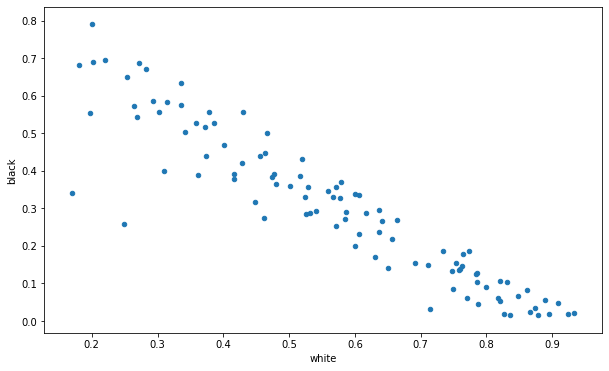

In [128]:
arrests.plot.scatter(x="white", y="black")

And the same parameters for style can also be used here.

(0, 1)

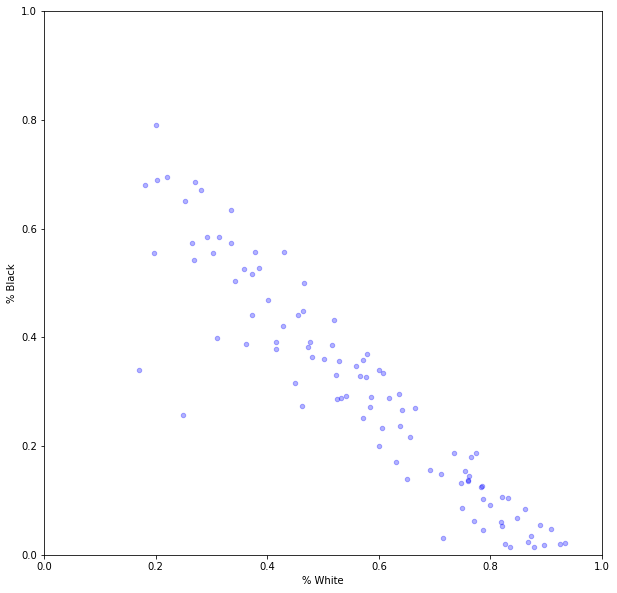

In [132]:
fig, ax = plt.subplots(1, figsize=(10, 10))
arrests.plot.scatter(ax=ax, x='white', y='black', alpha=0.3, color='blue')
ax.set_ylabel("% Black")
ax.set_xlabel("% White")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

### Hexplots

When a scatter plot has too many overlapping points, it might be difficult to interpret or see what's happening. For cases like those, we can use a hexplot, which aggregates points in space into hexagons, and then colorize those hexagons.

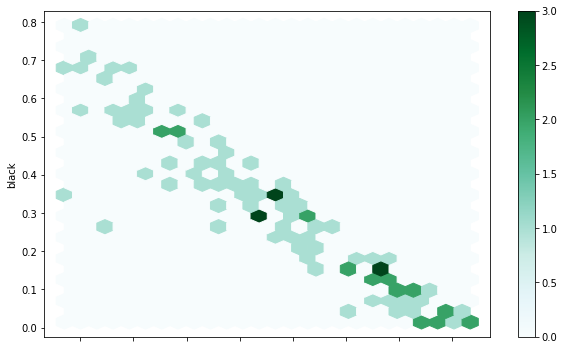

In [133]:
arrests.plot.hexbin(x='white', y='black', gridsize=25)

A hexplot resembles what a histogram does, but for bivariate distributions.

Hexplots and scatter plots can by applied to combinations of interval variables or ordinal categorical variables. To help aleviate overplotting, scatter plots (and, to a lesser extent, hexplots) benefit from variables which can take on a wide range of unique values.

### Stacked plots

Let's go back to our original stops data for a moment.

What if we want to know what types of traffic violations each biological sex tends be stopped for? Note that the NC data doesn't account for gender vs biological sex; it only has sex. 

In [144]:
# We're using `county_name` here just because we need a column other the two of interest to count observations.
stops.pivot_table(index=['reason_for_stop'], columns=['subject_sex'], values='county_name', aggfunc=len)

subject_sex,female,male
reason_for_stop,,
Checkpoint,72,145
Driving While Impaired,2898,9372
Investigation,8712,23838
Other Motor Vehicle Violation,23824,49847
Safe Movement Violation,16927,32911
Seat Belt Violation,7467,19481
Speed Limit Violation,107167,153665
Stop Light/Sign Violation,20154,34822
Vehicle Equipment Violation,29549,59596


With that new pivot table, are now able to use `bar()` as usual.

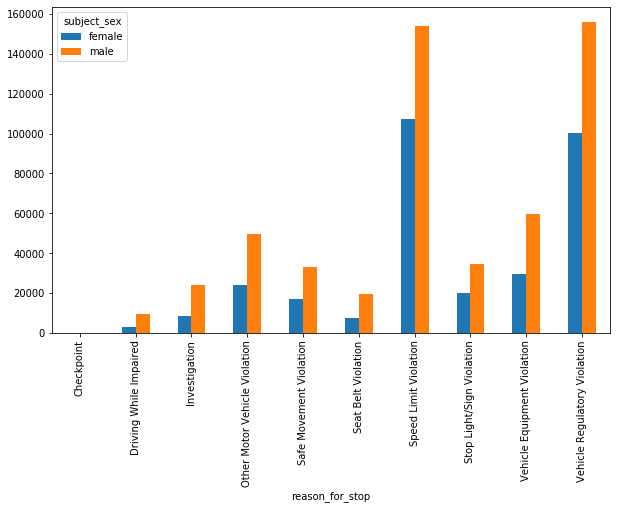

In [145]:
stops.pivot_table(index=['reason_for_stop'], columns=['subject_sex'], values='county_name', aggfunc=len).plot.bar()

Or stack it together per value of `violation`, and also changing the colors.

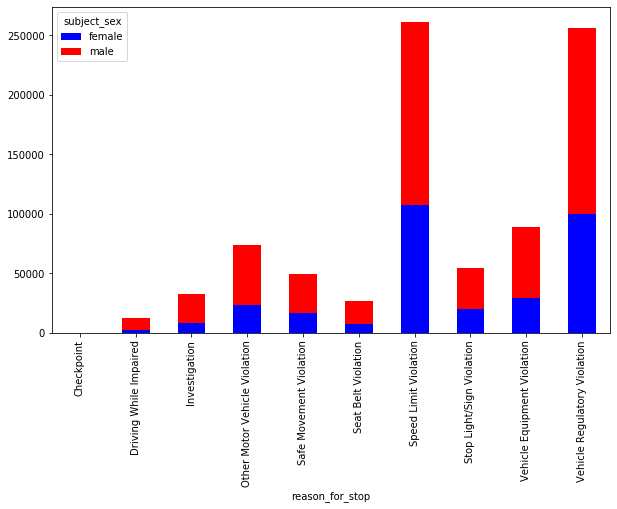

In [143]:
(stops
    .pivot_table(index=['reason_for_stop'], columns=['subject_sex'], values='county_name', aggfunc=len)
    .plot.bar(stacked=True, color=['blue', 'red']))

But if we wanted to have a 100% stacked graph, things get a bit messy with the simple Pandas plotting capabilities.

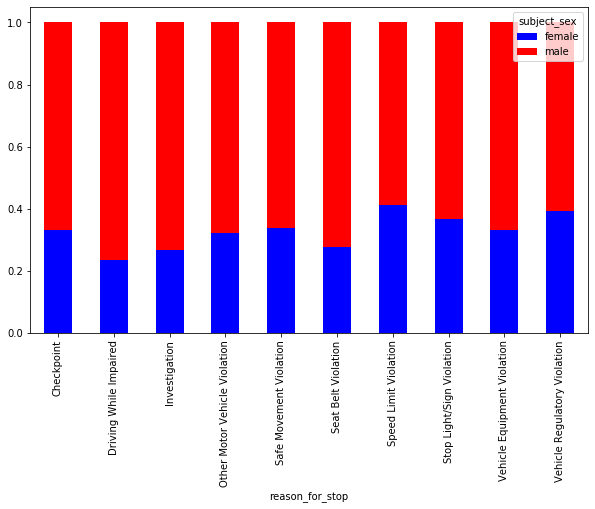

In [146]:
pivot_table = stops.pivot_table(index=['reason_for_stop'], columns=['subject_sex'], values='county_name', aggfunc=len)
pivot_table.div(pivot_table.sum(1), axis=0).plot.bar(stacked=True, color=['blue', 'red'])

The same things apply for area and line charts.

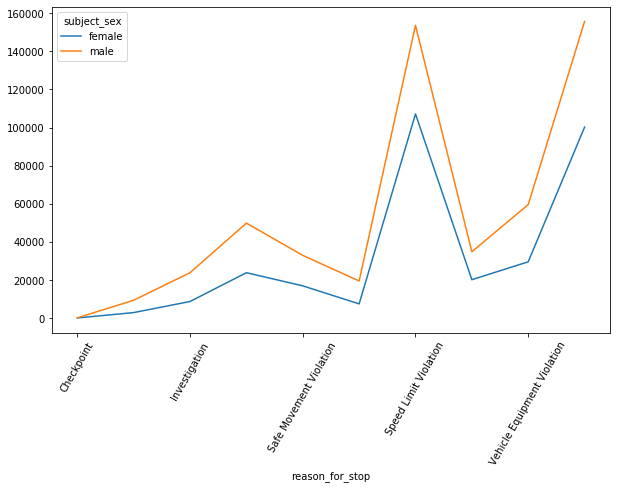

In [148]:
stops.pivot_table(index=['reason_for_stop'], columns=['subject_sex'], values='county_name', aggfunc=len).plot.line(rot=60)

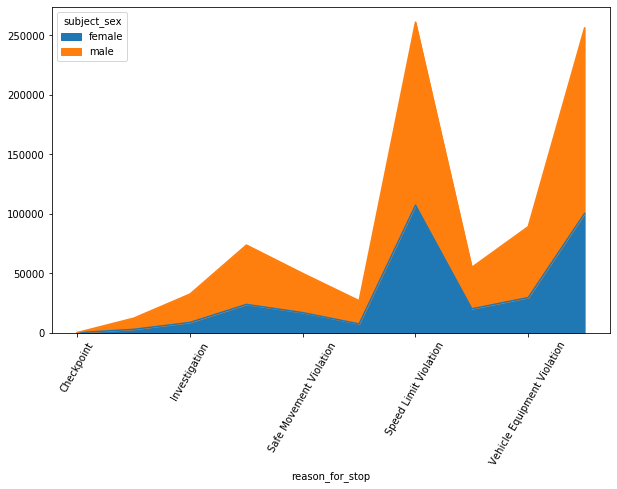

In [150]:
stops.pivot_table(index=['reason_for_stop'], columns=['subject_sex'], values='county_name', aggfunc=len).plot.area(rot=60)

### Boxplots (again)

Boxplots are also naturally good at representing more than 1 distribution

In [ ]:
stops.boxplot('driver_age', by='violation', grid=False)

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Using `stops_county`, plot a scatter plot for `pct_white_stopped` anad `pct_black_stopped` that uses a different color for points, shows a range of data between 0.1 and 0.3, and has 100 as the size of the points.
Output image should look something like this:
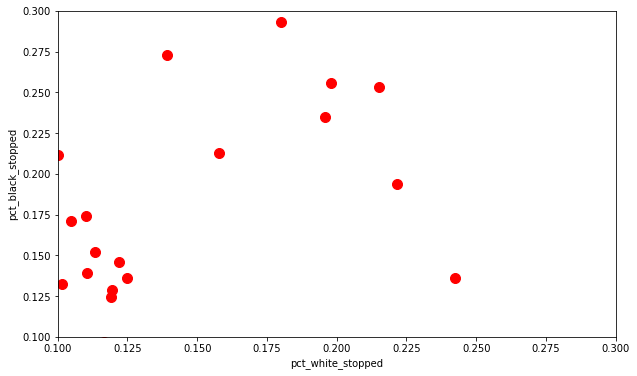
<br/>
* **Hint**: Take a look at the [documentaton for `scatter()`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.plot.scatter.html).*
</p>
</div>

In [ ]:
ax = stops_county.plot.scatter(x='pct_white_stopped', y='pct_black_stopped', s=100, color='red')
ax.set_xlim([.1, .3])
ax.set_ylim([.1, .3])

## Styling

matplotlib uses styles to guide the default visual aspects of a plot, and while those can always be changed individually, a style can be set for an entire Python session or set of plots. Beyond the default `classic` style, there are other styles available as well.

In [ ]:
plt.style.available

In [ ]:
with plt.style.context('Solarize_Light2'):
    stops['violation'].value_counts().plot.bar()

Even a special one for XKCD!

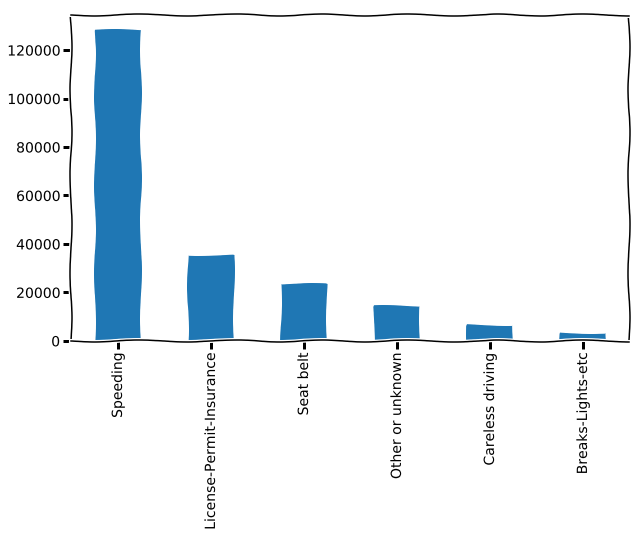

## Seaborn

`seaborn`, a convenience wrapper around `matplotlib`, changes the default style after being imported, but it can be reverted back easily setting the default style to `classic` using `plt.style.use("classic")`.

In [ ]:
import seaborn as sns
plt.style.use("seaborn")
stops['violation'].value_counts().plot.bar()

Seaborn is designed to work with *record-oriented* or *tidy* data out-of-the-box, for all of its plot types, with minimal fuss. This makes it an incredibly convenient workbench tool.

Pandas is not designed this way. In Pandas, every plot we generate is tied very directly to the input data. In essence, Pandas expects your data being in exactly the right output shape, regardless of what the input is.

Hence, in practice, despite its simplicity, the Pandas plotting tools are great for the initial stages of exploratory data analytics, but seaborn really becomes your tool of choice once you start doing more sophisticated explorations.

For example, to fit and show a regression line in a scatter plot, we just need to pass in `fit_reg` to seaborn's `lmplot()` or `regplot()`.

In [ ]:
sns.lmplot(data=stops_county, x='pct_black_stopped', y='pct_white_stopped', fit_reg=True) 

It can also group and split very easily too.

In [ ]:
sns.lmplot(data=stops_county, x='pct_black_stopped', y='pct_white_stopped', hue='bias', fit_reg=True) 

In [ ]:
sns.lmplot(data=stops_county, x='pct_black_stopped', y='pct_white_stopped', col='bias', fit_reg=True) 

Plotting a hexplot with accompanying histograms gets simple.

In [ ]:
sns.jointplot(data=stops_county, x='pct_black_stopped', y='pct_white_stopped', kind='hex', 
              gridsize=20)

Or creating a more visually enticing verson of the boxplot, the violin plot.

In [ ]:
sns.violinplot(x='violation', y='driver_age', data=stops)

In [ ]:
sns.set(palette="pastel", color_codes=True)
sns.violinplot(x='violation', y='driver_age', hue="driver_gender", split=True,
               inner="quart", palette={"male": "b", "female": "y"}, data=stops)

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
`stripplot()` and `swarmplot()` are types of categorical scatterplots that generalize a scatterplot to the case where one of the variables is categorical. The main different between them is that one avoids overlapping points while the other doesn't. `stripplot()` also allows to add some random `jitter` to get a nicer visualization.

Using `stops`, plot a `stripplot()` with jitter and a `swarmplot()` showing the distribution of drivers age by violation and driver gender, and only for the Chickasaw county.

Output images should look something like this:
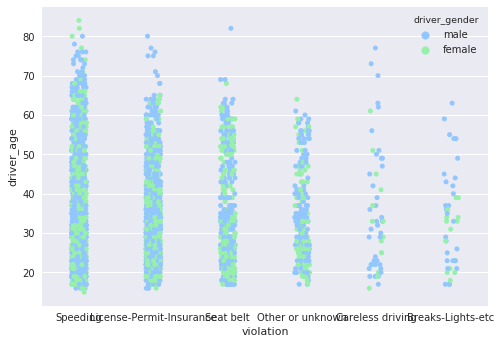
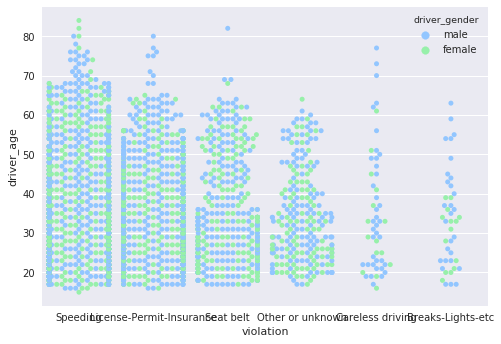
<br/>
* **Hint**: Now it's a good time to take a look at the seaborn [documentation](https://seaborn.pydata.org/index.html).*
</p>
</div>

In [ ]:
chickasaw = stops[stops['county_name'] == 'Chickasaw County']

In [ ]:
sns.stripplot(x="violation", y="driver_age", hue="driver_gender", jitter=True, data=chickasaw)

In [ ]:
sns.swarmplot(x="violation", y="driver_age", hue="driver_gender", data=chickasaw)

### Faceting

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.



In [ ]:
g = sns.FacetGrid(wd_violations, col='wk_day')
g.map(sns.distplot, 'total')

In [ ]:
g = sns.FacetGrid(wd_violations, col='violation')
g.map(sns.distplot, 'total')

In [ ]:
wd_viol_race = stops.groupby(['wk_day', 'violation', 'driver_race'])[['state']].count().reset_index().rename(columns={'state': 'total'})
wd_viol_race

In [ ]:
g = sns.FacetGrid(wd_viol_race, col='wk_day', hue='driver_race', col_wrap=3)
g.map(plt.scatter, 'total', 'violation')

## Resources for Interactive Visualization

- Bokeh
- Plotly

## Evaluation survey
Please, spend 1 minute answering these questions that can help us a lot on future workshops. 

https://go.ncsu.edu/dvs-eval

## Credits

This workshop was originally written and taught at Stanford University by Javier de la Rosa (Postdoctoral Research at UNED) and Scott Bailey.